## In this mini-project, let us analyse best selling books on amazon with a dataset of Amazon’s 50 Best Books between 2009 and 2019

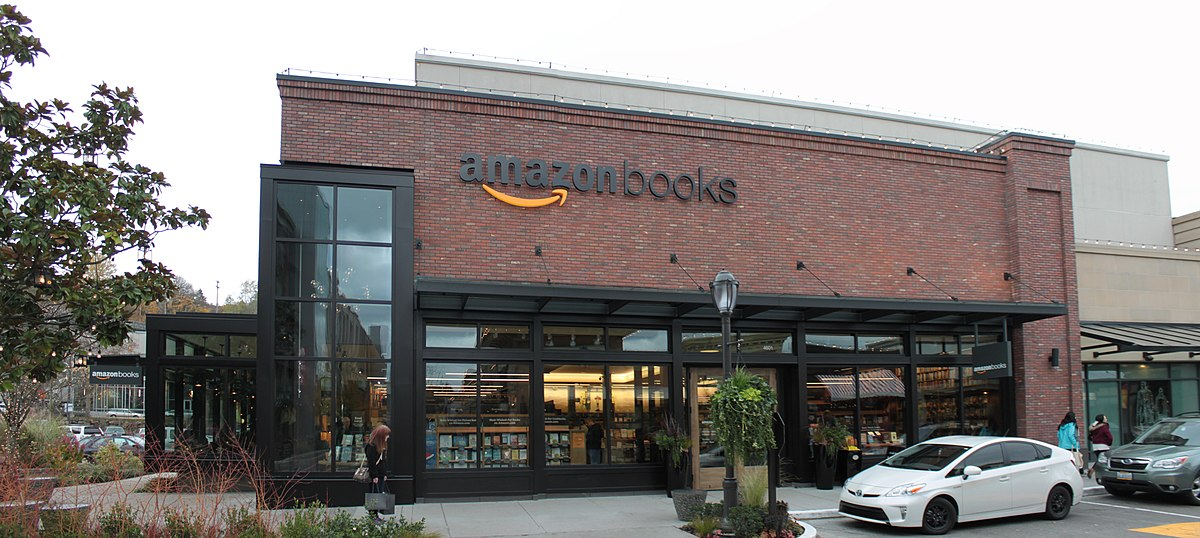

### Importing major libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params={'figure.figsize': [8,6], 
        'figure.dpi' : 150,
        'axes.labelsize': 'large'
        }
plt.rcParams.update(params)

import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid', palette='dark')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

import string

In [2]:
data=pd.read_csv('bestsellers with categories.csv')
print(data.shape)
data.head()

(550, 7)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**There are 7 columns in the dataset namely, "Name", "Author", "User Rating", "Reviews", "Price", "Year", "Genre"**

In [12]:
data.duplicated().sum()

0

In [22]:
punctuations=string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
data['name_len']=data['Name'].apply(lambda x: len(x)-x.count(" "))
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59


In [18]:
data['Author_len']=data['Author'].apply(lambda x: len(x.strip())-x.count(" "))

In [19]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,Author_len
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,7
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,11
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,16
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,12
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,22


In [23]:
# let's calculate punctuation % in the Name column

def count_(text):
    s=sum(1 for char in text if char in punctuations)
    return ((s/(len(text)-text.count(" "))))

data['punc%']=data['Name'].apply(lambda x: count_(x))
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,Author_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,7,0.038462
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,11,0.200000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,16,0.031250
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,12,0.100000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,22,0.101695


In [28]:
no_dup=data.drop_duplicates('Name')
no_dup

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,Author_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,7,0.038462
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,11,0.200000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,16,0.031250
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,12,0.100000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,22,0.101695
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,36,16,0.055556
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,75,16,0.053333
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,25,10,0.040000
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,39,10,0.076923
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,20,14,0.050000


In [31]:
g_count=no_dup['Genre'].value_counts()

In [33]:
sum(g_count.values), g_count.index

(351, Index(['Non Fiction', 'Fiction'], dtype='object'))

In [43]:
def make_autopct(values):
    
    def my_autopct(pct):
        total=sum(values)
        val=int(round(pct*total)/100.0)
        
        return f'{pct:0.2f}%\n({val:d})'
        
    return my_autopct



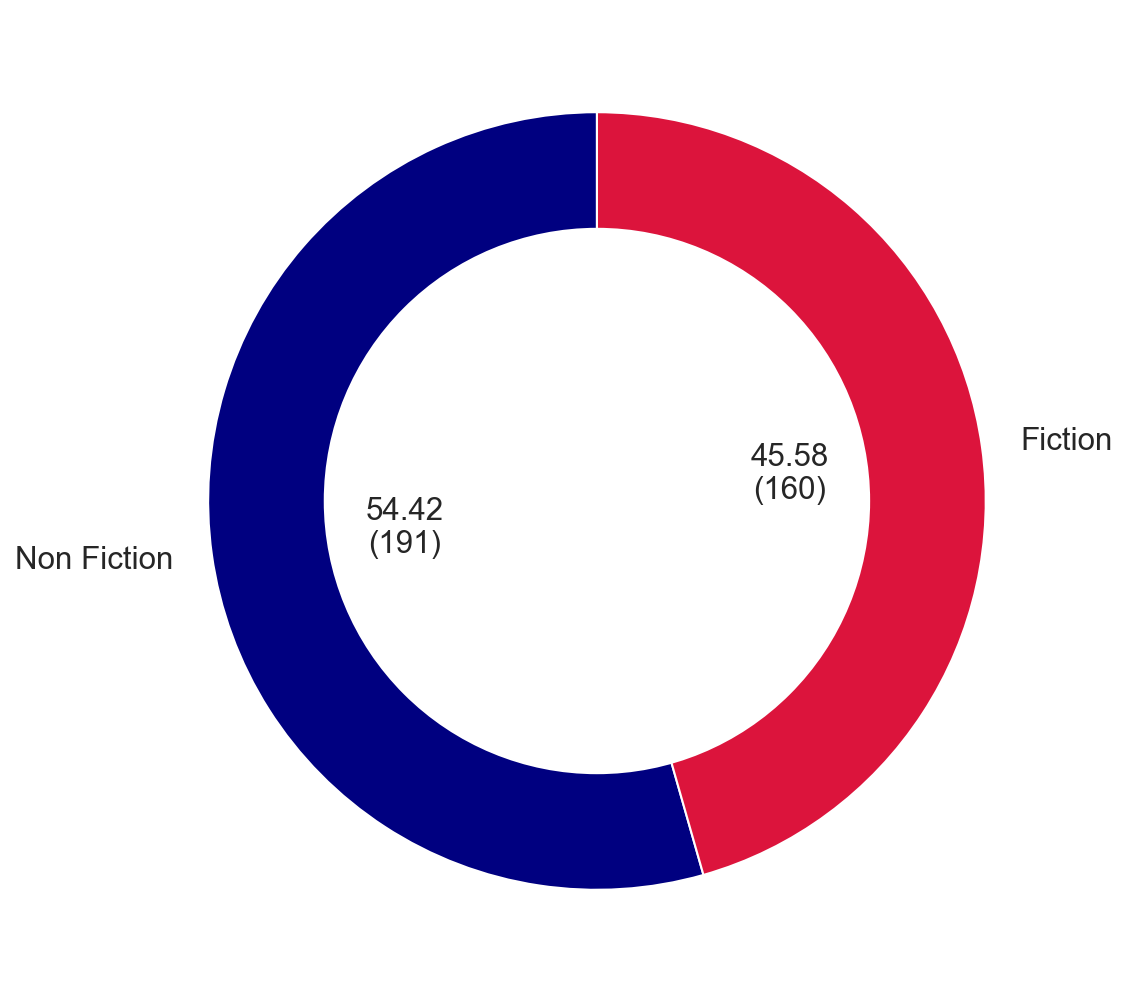

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
colors=['navy', 'crimson']
plt.pie(x=g_count.values, labels=g_count.index, colors=colors, autopct=make_autopct(g_count.values),
       startangle=90, textprops={'size': 15}, pctdistance=0.5)
center_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(center_circle)

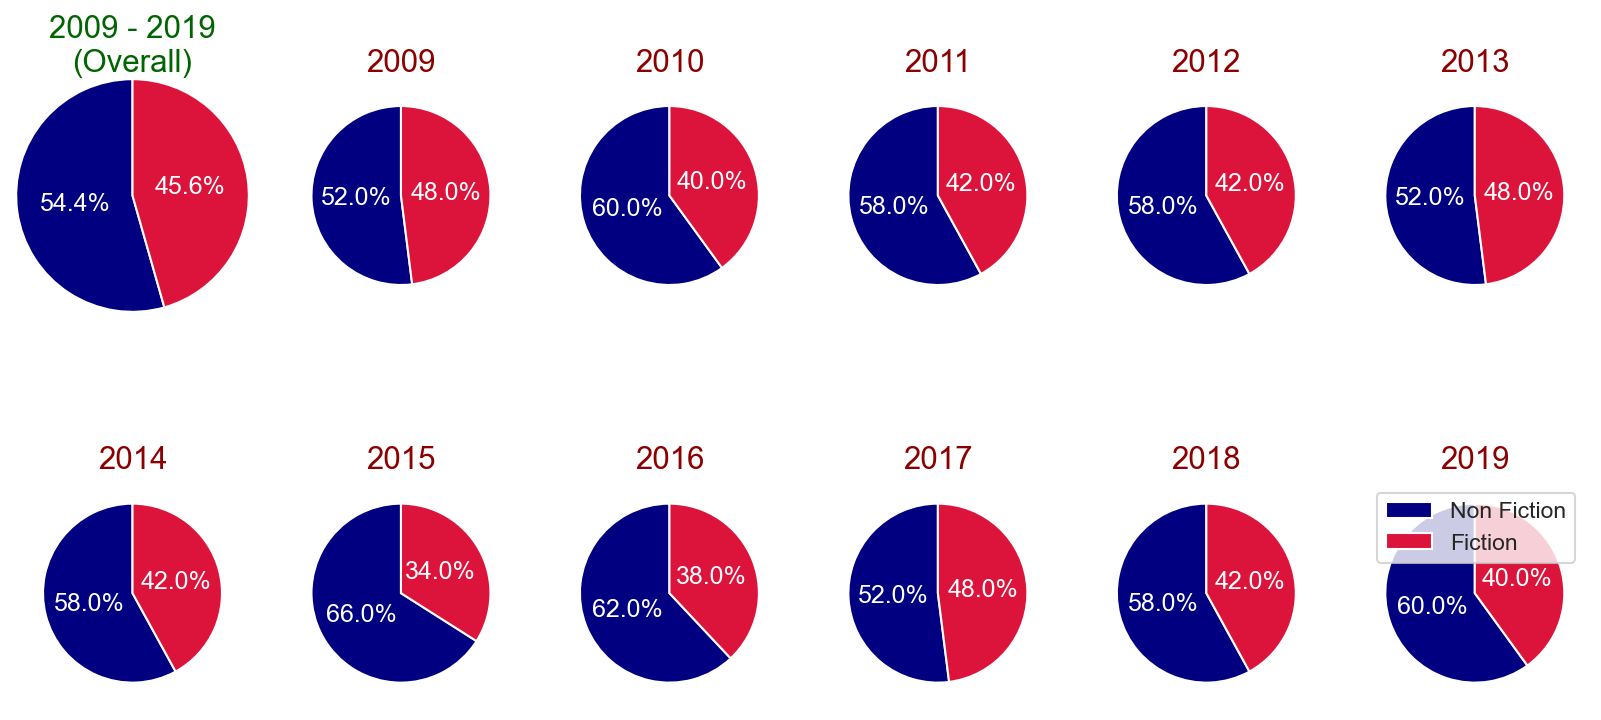

In [64]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)


fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=colors)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i,year in enumerate(y1):
    data_new=data[data['Year']==year]['Genre'].value_counts()
    ax[0,i+1].pie(x=data_new.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.0, colors=colors)
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})    
    
for i,year in enumerate(y2):
    data_new=data[data['Year']==year]['Genre'].value_counts()
    ax[1,i].pie(x=data_new.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.0, colors=colors)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})
    
plt.legend(g_count.index, loc='best')    

In [66]:
data[data.duplicated('Name')]

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,Author_len,punc%
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction,20,14,0.050000
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction,22,12,0.000000
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,8,13,0.000000
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction,20,15,0.000000
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,33,13,0.090909
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction,28,14,0.071429
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction,28,14,0.071429
51,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2010,Non Fiction,37,11,0.027027
52,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2011,Non Fiction,37,11,0.027027
57,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction,15,15,0.000000


Top-selling authors are selected based on their appearances in the top 50 best-selling books each year. The number of appearances includes duplicate book names. Their unique posts and overall reviews are featured below:

**let's create 3 charts in 3 columns where 1st chart would show Authors and number of appearences in top50, their no. of unique books in the second chart and no.of reviews in the 3rd chart**

In [70]:
# top 20 authors
top_authors=data['Author'].value_counts().nlargest(20)
top_authors

Jeff Kinney                           12
Suzanne Collins                       11
Rick Riordan                          11
Gary Chapman                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Dav Pilkey                             7
Eric Carle                             7
Bill O'Reilly                          7
Stephen R. Covey                       7
Stephenie Meyer                        7
J.K. Rowling                           6
Harper Lee                             6
E L James                              6
Don Miguel Ruiz                        6
Sarah Young                            6
The College Board                      6
Stieg Larsson                          6
Name: Author, dtype: int64

In [71]:
nodup=data.drop_duplicates('Name')
nodup.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,Author_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,7,0.038462
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,11,0.200000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,16,0.031250
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,12,0.100000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,22,0.101695


Text(0.5, 1.0, 'Total reviews')

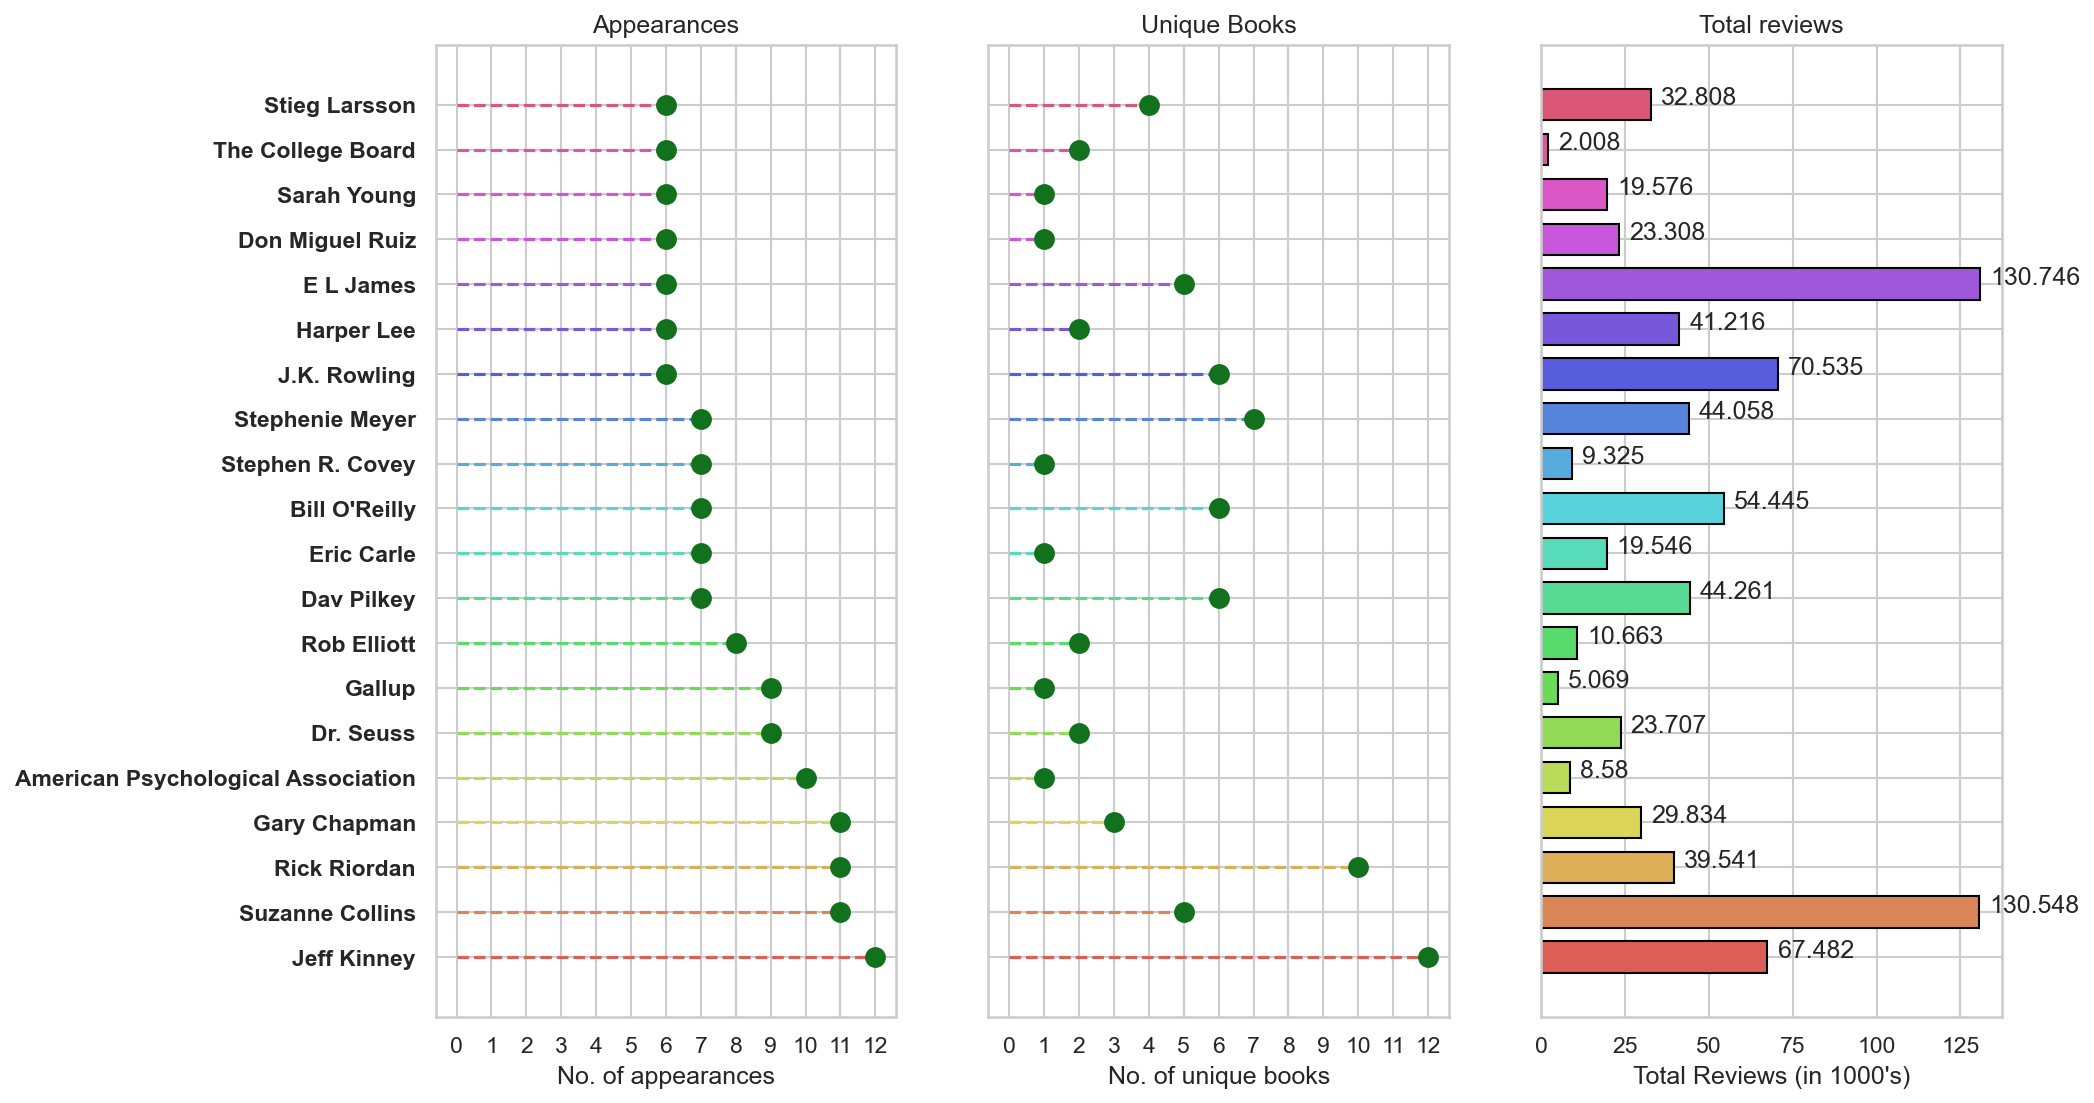

In [123]:
fig,ax=plt.subplots(1,3, figsize=(12,8), sharey=True)

colors=sns.color_palette("hls", n_colors=20)
ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, colors=colors, linestyle='dashed')
ax[0].plot(top_authors.values, top_authors.index,'go',markersize=9)
ax[0].set_xlabel('No. of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index,fontweight='semibold' )
ax[0].set_title('Appearances')

books_count=[]
reviews=[]

for name in list(top_authors.index):
    tmp_df=nodup[nodup['Author']==name]
    books_count.append(len(tmp_df['Name']))
    reviews.append(tmp_df['Reviews'].sum()/1000)

ax[1].hlines(y=top_authors.index, xmin=0, xmax=books_count, colors=colors, linestyle='dashed')
ax[1].plot(books_count, top_authors.index,'go',markersize=9)
ax[1].set_xlabel('No. of unique books')
ax[1].set_xticks(np.arange(max(books_count)+1))
ax[1].set_title('Unique Books')


ax[2].barh(y=top_authors.index, width=reviews, color=colors, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, reviews):
    ax[2].text(val+3,name,val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

## Conclusion

**Author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019. This is how we can analyze any data related to sales consisting of different categories.**